In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
df = pd.read_csv('medical_examination.csv')

In [308]:
df.shape

(70000, 13)

In [309]:
df.head(2).T

,0,1
id,0.0,1.0
age,18393.0,20228.0
sex,2.0,1.0
height,168.0,156.0
weight,62.0,85.0
ap_hi,110.0,140.0
ap_lo,80.0,90.0
cholesterol,1.0,3.0
gluc,1.0,1.0
smoke,0.0,0.0


In [5]:
df.nunique()

id             70000
age             8076
sex                3
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [6]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_copy = df.copy()

### Dealing with all the messy data and outliears in the data frame one by one

converting values into useable format

In [310]:
df['age'] = round(df['age']/365).astype(np.int8)

In [311]:
df['sex'] = df.sex.replace(3,np.nan).replace([1,2],['Male','Female'])

In [312]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,Female,168,62.0,110,80,1,1,0,0,1,0
1,1,55,Male,156,85.0,140,90,3,1,0,0,1,1
2,2,52,Male,165,64.0,130,70,3,1,0,0,0,1
3,3,48,Female,169,82.0,150,100,1,1,0,0,1,1
4,4,48,Male,156,56.0,100,60,1,1,0,0,0,0


In [313]:
df['cholesterol'] =  df['cholesterol'].map({1:'Normal',2:'High',3:'Very-high'})

In [314]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,Female,168,62.0,110,80,Normal,1,0,0,1,0
1,1,55,Male,156,85.0,140,90,Very-high,1,0,0,1,1
2,2,52,Male,165,64.0,130,70,Very-high,1,0,0,0,1
3,3,48,Female,169,82.0,150,100,Normal,1,0,0,1,1
4,4,48,Male,156,56.0,100,60,Normal,1,0,0,0,0


In [315]:
df['gluc'] = df['gluc'].apply(lambda x: 0 if x==1 else 1)

In [316]:
cl=[]
cl.append(df.copy())

In [317]:
df = cl[0].copy()

In [318]:
df['smoke'] = df['smoke'].replace({1:'yes',0:'No'})

In [319]:
df['gluc'] = df['gluc'].replace({1:'yes',0:'No'})

In [320]:
df['alco'] = df['alco'].replace({1:'yes',0:'No'})

In [321]:
df['active'] = df['active'].replace({1:'yes',0:'No'})

In [322]:
df['cardio'] = df['cardio'].replace({1:'yes',0:'No'})

Removing unwanted columns

In [323]:
df.drop(columns=['ap_hi','ap_lo'],inplace=True)

### Now we will be removing outlier's

In [324]:
df.describe()

,id,age,height,weight
count,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,164.359229,74.205690
std,28851.302323,6.765294,8.210126,14.395757
min,0.000000,30.000000,55.000000,10.000000
25%,25006.750000,48.000000,159.000000,65.000000
50%,50001.500000,54.000000,165.000000,72.000000
75%,74889.250000,58.000000,170.000000,82.000000
max,99999.000000,65.000000,250.000000,200.000000


Fixing weight and height outliers

<Axes: >

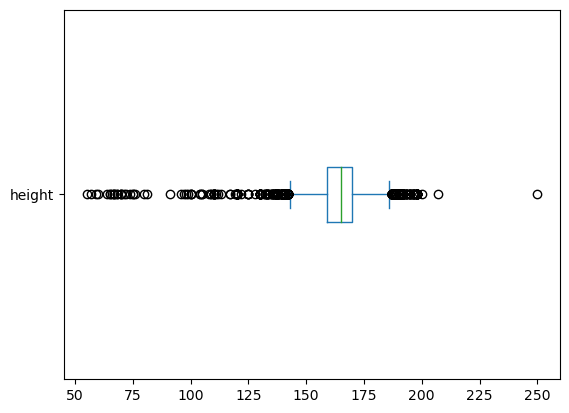

In [325]:
df['height'].plot(kind='box',vert=False)

In [327]:
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1              # inter quirtile range quater 3 minus quater 1
    lb = q1 - 1.5*iqr        # lower bound
    ub = q3 + 1.5*iqr        # upper bound
    return df.loc[(df[col]>lb)&(df[col]<ub)]

In [329]:
df = remove_outliers(remove_outliers(df,'height'),'weight')

In [330]:
df.describe()

,id,age,height,weight
count,67723.000000,67723.000000,67723.000000,67723.000000
mean,49954.535741,53.337684,164.310013,73.059601
std,28861.291552,6.767091,7.565537,12.407575
min,0.000000,30.000000,143.000000,40.000000
25%,24960.500000,48.000000,159.000000,65.000000
50%,49993.000000,54.000000,165.000000,72.000000
75%,74859.500000,58.000000,170.000000,81.000000
max,99999.000000,65.000000,186.000000,107.000000


In [331]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio'],
      dtype='object')

<Axes: xlabel='alco', ylabel='count'>

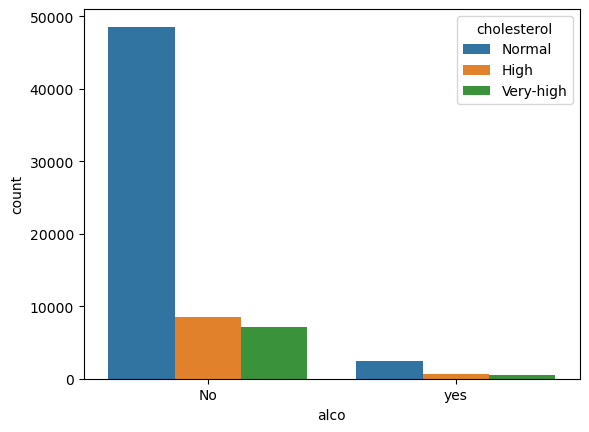

In [332]:
sns.barplot(data= df.groupby('alco',as_index=False)['cholesterol'].value_counts(),hue='cholesterol',x='alco',y='count')

In [333]:
df.groupby('alco',as_index=False)['cholesterol'].value_counts(normalize=True)

,alco,cholesterol,proportion
0,No,Normal,0.756847
1,No,High,0.131803
2,No,Very-high,0.111350
3,yes,Normal,0.676553
4,yes,High,0.188864
5,yes,Very-high,0.134583


In [334]:
def histall(df):
    cl = list(df.columns)
    ln = range(1,(len(cl)+1))
    l = zip(cl,ln)
    s=5
    plt.figure(figsize=(s,s*len(cl)))
    for i,j in l:
        plt.subplot(len(cl),1,j)
        plt.title( i)
        plt.xlabel('-'*100)
        sns.histplot(x=df[i])

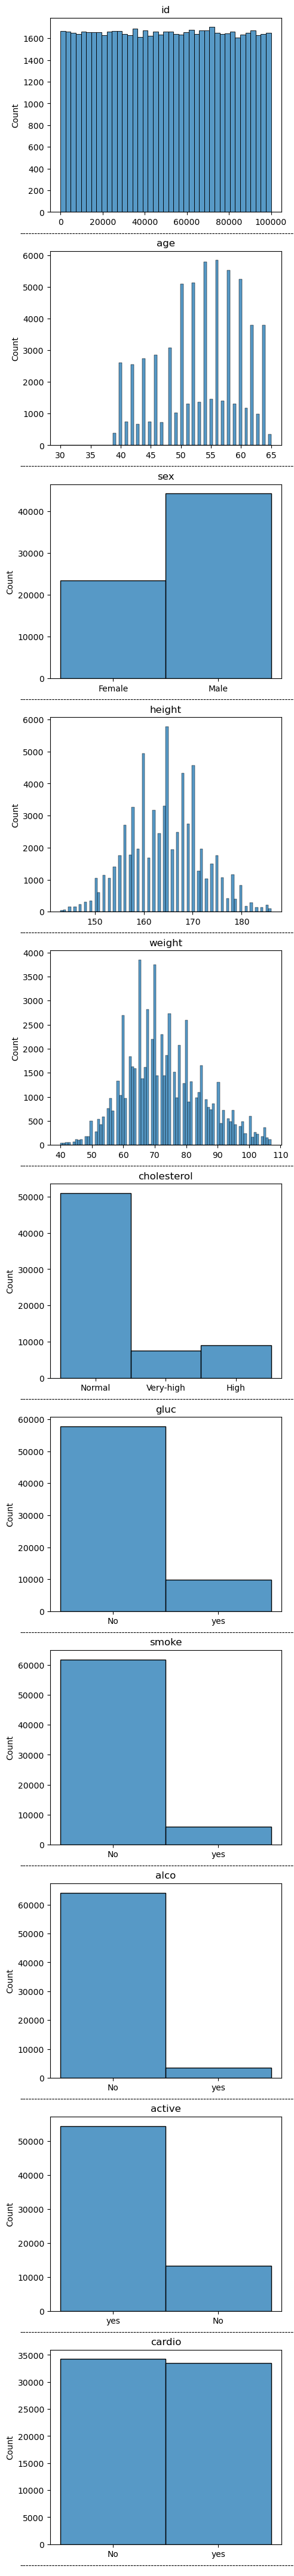

In [335]:
histall(df)

In [336]:
df.head()

,id,age,sex,height,weight,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,Female,168,62.0,Normal,No,No,No,yes,No
1,1,55,Male,156,85.0,Very-high,No,No,No,yes,yes
2,2,52,Male,165,64.0,Very-high,No,No,No,No,yes
3,3,48,Female,169,82.0,Normal,No,No,No,yes,yes
4,4,48,Male,156,56.0,Normal,No,No,No,No,No


<Axes: xlabel='weight', ylabel='Count'>

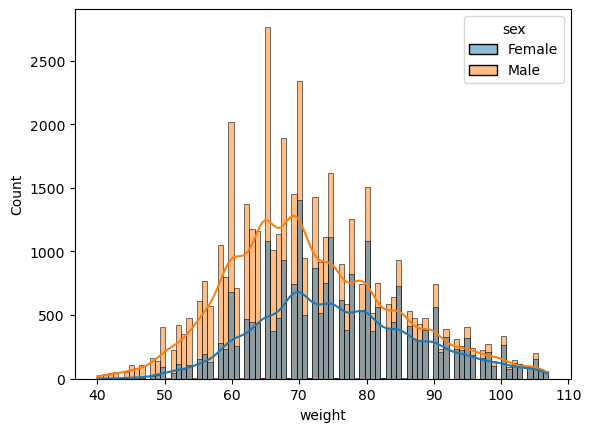

In [337]:
sns.histplot(data=df,x='weight',hue='sex',kde=True)

In [338]:
df['sex'].value_counts()

sex
Male      44268
Female    23444
Name: count, dtype: int64

In [339]:
male = df.loc[(df.sex == 'Male')].sample(22000)
female = df.loc[(df.sex == 'Female')].sample(22000)
weight = pd.concat([male,female],axis=0)[['sex','weight']]

,weight
sex,
Female,75.850800
Male,71.664414


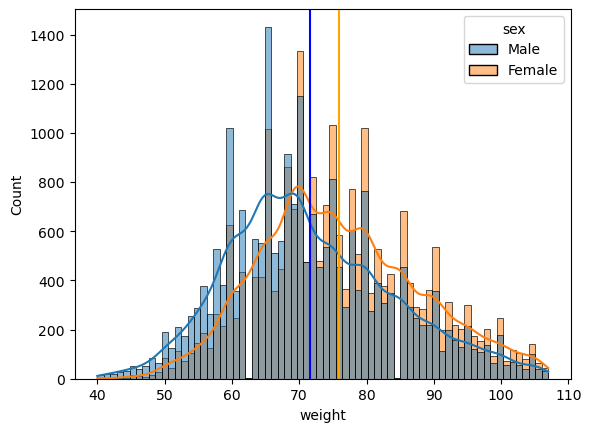

In [340]:
sns.histplot(data=weight, x='weight',hue='sex',kde=True)
plt.axvline(weight.loc[weight['sex']=='Female','weight'].mean(),color='orange')
plt.axvline(weight.loc[weight['sex']=='Male','weight'].mean(),color='Blue')
weight.groupby('sex')[['weight']].mean()

In [341]:
weight.groupby('sex')['weight'].mean()

sex
Female    75.850800
Male      71.664414
Name: weight, dtype: float64

In [342]:
df.head()

,id,age,sex,height,weight,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,Female,168,62.0,Normal,No,No,No,yes,No
1,1,55,Male,156,85.0,Very-high,No,No,No,yes,yes
2,2,52,Male,165,64.0,Very-high,No,No,No,No,yes
3,3,48,Female,169,82.0,Normal,No,No,No,yes,yes
4,4,48,Male,156,56.0,Normal,No,No,No,No,No


In [343]:
df.gluc.value_counts()

gluc
No     57803
yes     9920
Name: count, dtype: int64

,id,age,height,weight
id,1.000000,0.002534,-0.003536,-0.002734
age,0.002534,1.000000,-0.086456,0.068059
height,-0.003536,-0.086456,1.000000,0.309946
weight,-0.002734,0.068059,0.309946,1.000000


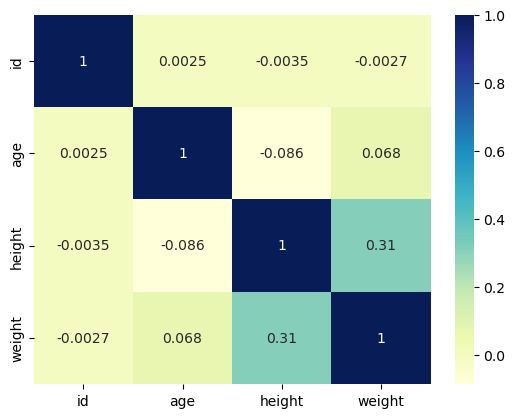

In [344]:
sns.heatmap(df[(list(df.describe().columns))].corr(),cmap="YlGnBu",annot=True)
df[(list(df.describe().columns))].corr()

<Axes: xlabel='weight', ylabel='height'>

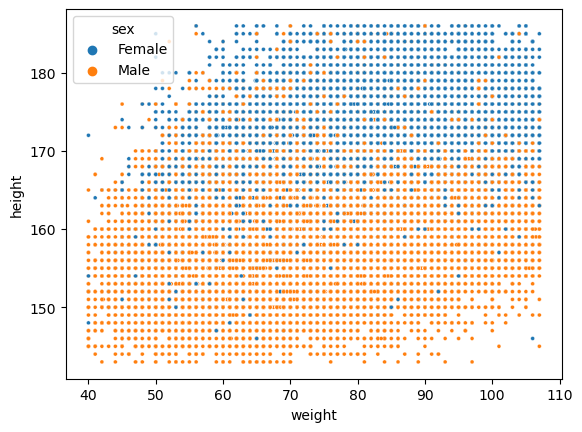

In [345]:
sns.scatterplot(data=df,x='weight',y='height',s=8,hue='sex')

In [299]:
df.head()

,id,age,sex,height,weight,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,Female,5.5,62.0,Normal,No,No,No,yes,No
1,1,55,Male,5.1,85.0,Very-high,No,No,No,yes,yes
2,2,52,Male,5.4,64.0,Very-high,No,No,No,No,yes
3,3,48,Female,5.5,82.0,Normal,No,No,No,yes,yes
4,4,48,Male,5.1,56.0,Normal,No,No,No,No,No


1. **Distribution of Cholesterol Levels**: How are cholesterol levels distributed across the population, and do they vary by age or sex?

2. **Relationship between Age and Cardiovascular Disease**: Is there a correlation between age and the likelihood of having cardiovascular disease (cardio)? What age groups are most at risk?

3. **Impact of Smoking on Cardiovascular Disease**: How does smoking status (smoke) impact the likelihood of having cardiovascular disease?

4. **Effect of Alcohol Consumption on Cardiovascular Disease**: Is there a relationship between alcohol consumption (alco) and cardiovascular disease?

5. **Influence of Physical Activity on Health**: How does physical activity (active) impact cholesterol levels, glucose levels, and cardiovascular health?

6. **BMI Analysis**: Calculate the BMI (Body Mass Index) for each individual and analyze its impact on cardiovascular health and other health metrics.

7. **Sex Differences in Health Metrics**: Are there notable differences in health metrics (cholesterol, glucose, etc.) and the prevalence of cardiovascular disease between males and females?

8. **Interactions between Multiple Risk Factors**: Explore how combinations of risk factors (smoking, alcohol consumption, physical activity, etc.) impact the risk of cardiovascular disease.

9. **Predicting Cardiovascular Disease**: Use the data to create a predictive model for cardiovascular disease based on factors such as age, sex, cholesterol, glucose, and lifestyle choices.

10. **Longitudinal Analysis of Health Metrics**: If you have data over time, explore how health metrics and lifestyle choices change as individuals age, and how these changes relate to cardiovascular health.

In [346]:
df.head()

,id,age,sex,height,weight,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,Female,168,62.0,Normal,No,No,No,yes,No
1,1,55,Male,156,85.0,Very-high,No,No,No,yes,yes
2,2,52,Male,165,64.0,Very-high,No,No,No,No,yes
3,3,48,Female,169,82.0,Normal,No,No,No,yes,yes
4,4,48,Male,156,56.0,Normal,No,No,No,No,No


In [400]:
cholesterol_by_age = df.groupby('age',as_index=False)['cholesterol'].value_counts()

In [396]:
cholesterol_by_sex = df.groupby('sex',as_index=False)['cholesterol'].value_counts()

In [389]:
binlabel= (list(range(35,70,5)))
cholesterol_by_age['bin'] = pd.cut(cholesterol_by_age['age'],bins=7,labels=binlabel)

<Axes: xlabel='bin', ylabel='count'>

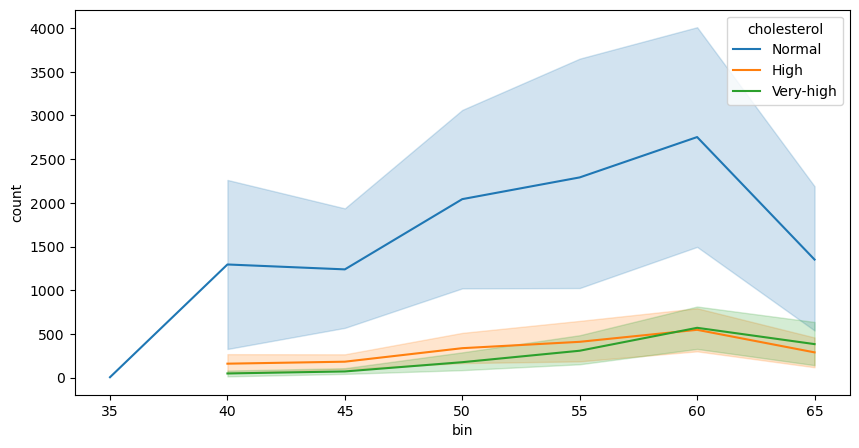

In [395]:
plt.figure(figsize=(10,5))
sns.lineplot(data=cholesterol_by_age,x='bin',y='count',hue='cholesterol')

<Axes: xlabel='cholesterol', ylabel='count'>

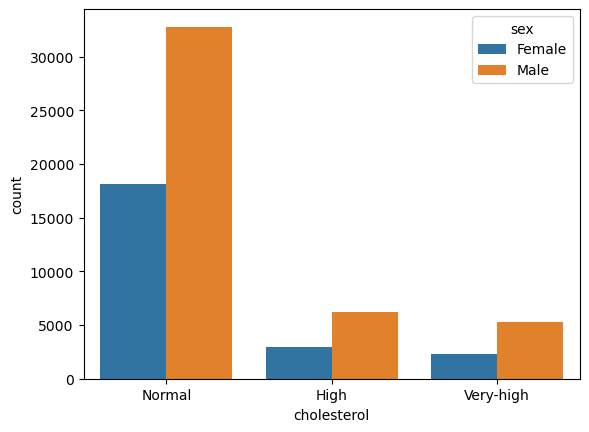

In [398]:
sns.barplot(data=cholesterol_by_sex,x='cholesterol',y='count',hue='sex')

<Axes: xlabel='age', ylabel='count'>

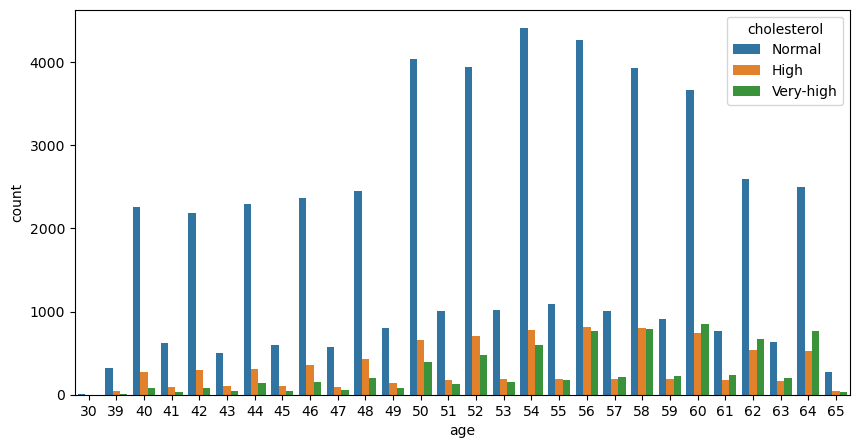

In [394]:
plt.figure(figsize=(10,5))
sns.barplot(data=cholesterol_by_age,x='age',y='count',hue='cholesterol')

In [401]:
cholesterol_by_age

,age,cholesterol,count
0,30,Normal,4
1,39,Normal,327
2,39,High,50
3,39,Very-high,14
4,40,Normal,2262
...,...,...,...
77,64,Very-high,768
78,64,High,528
79,65,Normal,268
80,65,High,45
